In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import math

### One Sample t-Test for a Mean Value

Se utiliza cuando la poblecion de referencia sigue una distribucion normal.


#### Ejercicio

Unos estudiantes sacan las siguientes notas: [ 109.4, 76.2, 128.7, 93.7, 85.6,
117.7, 117.2, 87.3, 100.3, 55.1]. Son peores estudiantes que los estudiantes de todo el pais que tienen una media de 110 ?

In [22]:
data = [109.4, 76.2, 128.7, 93.7, 85.6, 117.7, 117.2, 87.3, 100.3, 55.1]

In [ ]:
# Hipótesis inicial. La muestra está dentro de la población con media de 110

In [23]:
#Saco la media muestral
np.mean(data)

97.11999999999999

In [4]:
# Vamos a calcular la probabilidad de desviarse de la media de la hipótesis (110) más de 97.11, tanto para un lado 
# como para el otro lado (110 + (110 - 97.11))

In [24]:
u = 110
n = 10
s = np.std(data)

In [25]:
mi_t = stats.t(9)

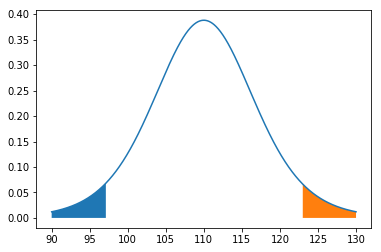

In [26]:
x = np.linspace(90, 130, 1000)
d = list(map(mi_t.pdf, (x-u)/(s/math.sqrt(n))))
plt.plot(x, d)

x1 = np.linspace(90, 97.12, 1000)
d1 = list(map(mi_t.pdf, (x1-u)/(s/math.sqrt(n))))
plt.fill_between(x = x1, y1 = d1)

x2 = np.linspace(123, 130, 1000)
d2 = list(map(mi_t.pdf, (x2-u)/(s/math.sqrt(n))))
plt.fill_between(x = x2, y1 = d2)

plt.show()

In [27]:
2 * mi_t.cdf((97.12 - 110) / (s/math.sqrt(n)))

0.08494194770563418

In [28]:
# Como esta probabilidad es mayor a 5% entonces no podemos rechazar esta hipótesis. La muestra pertenece a la población
# por lo que no podemos decir que son peores de los estudiantes de todo el país porque son parte de los estudiantes de
# todo el país

### Ejercicio 
El consumo de energia de 11 mujeres es [5260., 5470., 5640., 6180.,
6390., 6515., 6805., 7515., 7515., 8230., 8770.]
Es significativamente diferente del valor recomendado de 7725 ?

In [38]:
data = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

In [39]:
media = np.mean(data)
u = 7725
n = len(data)
s = np.std(data, ddof = 1)
mi_t = stats.t(n-1)
2 * mi_t.cdf((media - u) / (s/math.sqrt(n)))

0.018137235176105812

In [ ]:
# Como el p valor es menor al 5% entonces rechazamos la hipótesis

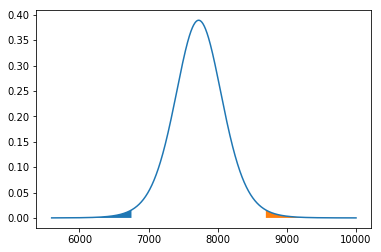

In [40]:
x = np.linspace(5600, 10000, 1000)
d = list(map(mi_t.pdf, (x-u)/(s/math.sqrt(n))))
plt.plot(x, d)

x1 = np.linspace(5600, media, 1000)
d1 = list(map(mi_t.pdf, (x1-u)/(s/math.sqrt(n))))
plt.fill_between(x = x1, y1 = d1)

x2 = np.linspace(u + abs(u-media), 10000, 1000)
d2 = list(map(mi_t.pdf, (x2-u)/(s/math.sqrt(n))))
plt.fill_between(x = x2, y1 = d2)

plt.show()

In [41]:
stats.ttest_1samp(data, u)

Ttest_1sampResult(statistic=-2.8207540608310198, pvalue=0.018137235176105812)

### Two-Sample T-Test

Hipotesis nula: La media de ambas distribuciones es la misma

#### Ejemplo

2 pizzerias envian pizzas a casa y queremos saber si hay una diferencia en el envio medio de pizzas entre la empresa A o B

In [42]:
pizzeriaA = [20.4,24.2,15.4,21.4,20.2,18.5,21.5]
pizzeriaB = [20.2,16.9,18.5,17.3,20.5]

In [43]:
stats.ttest_ind(pizzeriaA, pizzeriaB)

Ttest_indResult(statistic=1.1193627069386796, pvalue=0.28915100822275147)

In [44]:
#El p valor es mayor que el 5%. No podemos rechazar la hipótesis inicial de que tienen la misma media

La diferencia de las 2 muestras sigue una variable de Student: $t=\frac{(\bar{X}_1-\bar{X}_2)}{\sigma_{\bar{X}_1-\bar{X}_2}}$

La varianza es calculada con la siguiente formula: Sp = $\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}$ $\sigma_{\bar{X}_1-\bar{X}_2}=Sp\sqrt{1/n_1+1/n_2}$

In [45]:
#### Ejercicio
#### Han cambiado las caracteristicas del coche entre 2 carreras

carrera1 = [79, 100,93, 75, 84, 107, 66, 86, 103, 81, 83, 89, 105, 84, 86, 86, 112, 112, 100, 94]
carrera2 = [92, 100, 76, 97, 72, 79, 94, 71, 84, 76, 82, 57, 67, 78, 94, 83, 85, 92, 76, 88]

In [46]:
stats.ttest_ind(carrera1, carrera2)

Ttest_indResult(statistic=2.4347560914234383, pvalue=0.019707660766082435)

In [ ]:
#Podemos rechazar la hipótesis de que tienen la misma media

#### Ejercicio 
En una clinica, 15 pacientes vagos pesan: [76, 101, 66, 72, 88, 82, 79, 73, 76, 85, 75, 64,
76, 81, 86.] kg y los deportistas [ 64, 65, 56, 62, 59, 76, 66, 82, 91,
57, 92, 80, 82, 67, 54] kg

Son los vagos mas pesados ?

### Paired T-test

Se utiliza para ver la variacion de una poblacion normal en el tiempo (2 muestras que provienen de la misma poblacion y con la misma varianza).
Es equivalente al test con una muestra comparando con una media de cero.

In [15]:
np.random.seed(1234)
data = np.random.randn(10)+0.1
data1 = np.random.randn(10)*5 
data2 = data1 + data 

In [16]:
data

array([ 0.57143516, -1.09097569,  1.53270697, -0.2126519 , -0.62058873,
        0.98716294,  0.95958841, -0.5365235 ,  0.11569637, -2.14268495])

#### Ejercicio

Las notas de un conjunto de 8 estudiantes en un test de fisica es: 60, 62, 67, 69, 70, 72, 75, and 78
Testear si la media es significativamente distinta de 65.
El investigador se da cuenta de que accidentalmente ha puesta 76 en vez de 67. Son las notas corregidas significativamente distintas de 65 ahora ?

Se realiza un experimento sobre los efectos del alcohol con respecto a las abilidades motoras. 10 sujetos son testeados 2 veces, una vez tomando 2 copas de alcohol y otra tomando 2 copas de agua. A mayor nota, mejor es la abilidad motora. Comparar ambas distribuciones para ver si el alcohol hace efecto o no.

In [50]:
water = np.array([16.0, 15.0, 11.0, 20.0, 19.0, 14.0, 13.0, 15.0, 14.0, 16.0])
alcohol = np.array([13.0, 13.0, 10.0, 18.0, 17.0, 11.0, 10.0, 15.0, 11.0, 16.0])

In [51]:
stats.ttest_rel(water, alcohol)

Ttest_relResult(statistic=5.0185701660560547, pvalue=0.00072049133854553316)

In [53]:
dif = water - alcohol
stats.ttest_1samp(dif, 0)

Ttest_1sampResult(statistic=5.0185701660560547, pvalue=0.00072049133854553316)

Las notas de un test de vocabulario en un grupo de personas de 20 anos y de 60 anos aparecen aqui abajo. Tiene efecto la edad en las notas ?

In [54]:
age20= [27.0, 26.0, 21.0, 24.0, 15.0, 18.0, 17.0, 12.0, 13.0]
age60= [26.0, 29.0, 29.0, 29.0, 27.0, 16.0, 20.0, 27.0]

In [56]:
stats.ttest_ind(age20, age60)

Ttest_indResult(statistic=-2.4236422879882413, pvalue=0.028476486004354491)

In [ ]:
#Rechazamos la hipótesis inicial de que tienen la misma media. Tiene efecto la edad

### Wilcoxon Signed Rank Sum Test

Se utiliza para distribuciones no normales y concierne los rangos:

* Calcular la diferencia entre cada observacion y el valor de interes.
* Ignorar el signo de la diferencia, ordenarlo por orden de magnitud
* Calcular la suma de los rankings con el signo.

# Ejercicio

Se estudia la eficacia de un nuevo medicamento para reducir comportamiento obsesivo en ninos autistas. Se le suministra a  10 ninos y se establece una nota de comportamiento.

In [21]:
before=np.array([125.0, 115.0, 130.0, 140.0, 140.0, 115.0, 140.0, 125.0, 140.0, 135.0])
after=np.array([110.0, 122.0, 125.0, 120.0, 140.0, 124.0, 123.0, 137.0, 135.0, 145.0])

In [30]:
before=np.array([85.0, 70.0, 40.0, 65.0, 80.0, 75.0, 55.0, 20.0])
after=np.array([75.0, 50.0, 50.0, 40.0, 20.0, 65.0, 40.0, 25.0])

In [33]:
### Ejercicio

In [34]:
before=np.array([125.0,
 132.0,
 138.0,
 120.0,
 125.0,
 127.0,
 136.0,
 139.0,
 131.0,
 132.0,
 135.0,
 136.0,
 128.0,
 127.0,
 130.0])

after=np.array([118.0,
 134.0,
 130.0,
 124.0,
 105.0,
 130.0,
 130.0,
 132.0,
 123.0,
 128.0,
 126.0,
 140.0,
 135.0,
 126.0,
 132.0])

## Por que funciona ?

Intuitivamente, los rangos deberian anularse unos a otros: Es decir que el movimiento en el ranking de un elemento seria compensado por el movimiento de otro.
Pero para entenderlo mejor, cojamos un ejemplo en el que comparamos la evolucion de una muestra con 3 elementos. Despues de calcular los rankings, tendriamos las siguientes posibilidades para el W positivo (suma de los rankings con signo positivo):

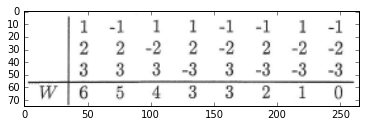

In [48]:
plt.imshow(plt.imread("ExactW_n3.gif"))

Ya vemos que es mas probable que este en 3 (hay 2 ocurencias)

Si aumentamos el numero de N (elementos en la muestra), W tiende a una distribucion normal. Para N inferiores a 10, usamos las tablas de Wilcoxon